In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jul  5 20:07:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

3.1. RO1 MER of North American accents vs UK and Irish accents

In [ ]:
# mount data from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data1=pd.read_csv('/content/drive/MyDrive/full_data_final_3.csv')
display(data1)

Mounted at /content/drive


,speakerid,Age,L1,L1_coded,Sex,WER,MER,Norm_area
0,1544,26.0,English_BI,1,0,0.260870,0.257143,534.065010
1,516,19.0,English_BI,1,0,0.188406,0.183099,330.097996
2,900,66.0,English_BI,1,0,0.173913,0.173913,609.151834
3,638,19.0,English_BI,1,0,0.144928,0.142857,621.912777
4,1502,22.0,English_BI,1,1,0.130435,0.125000,315.201436
...,...,...,...,...,...,...,...,...
489,818,77.0,English_NA,2,1,0.000000,0.000000,180.678004
490,1328,77.0,English_NA,2,1,0.000000,0.000000,1915.718960
491,1307,80.0,English_NA,2,0,0.000000,0.000000,1476.386990
492,1324,85.0,English_NA,2,0,0.000000,0.000000,1016.899250


**STATS for RO1**

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# check for correct dataset - cal
df = data1

# Rename the columns for clarity - L1_coded is the variable of interest
df.columns = ['speakerid', 'Age', 'L1', 'L1_coded', 'Sex', 'WER', 'MER', 'Norm_area']

# Drop rows with missing values in the 'speakerid' column
df = df.dropna(subset=['speakerid'])

# Perform the linear mixed effects model with age, sex, and their interactions with L1
model = smf.mixedlm("MER ~ L1_coded * Age * Sex", df, groups=df["speakerid"])
result = model.fit()

# Print the model summary
print(result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   MER     
No. Observations:     494       Method:               REML    
No. Groups:           494       Scale:                0.0005  
Min. group size:      1         Log-Likelihood:       947.4712
Max. group size:      1         Converged:            Yes     
Mean group size:      1.0                                     
--------------------------------------------------------------
                 Coef.    Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept         0.080       0.024  3.344 0.001  0.033  0.126
L1_coded         -0.035       0.013 -2.743 0.006 -0.060 -0.010
Age               0.000       0.001  0.370 0.712 -0.001  0.002
L1_coded:Age     -0.000       0.000 -0.050 0.960 -0.001  0.001
Sex              -0.073       0.038 -1.916 0.055 -0.149  0.002
L1_coded:Sex      0.032       0.020  1.606 0.108 -0.007  0.072
Age:S

**FIGURE 2**

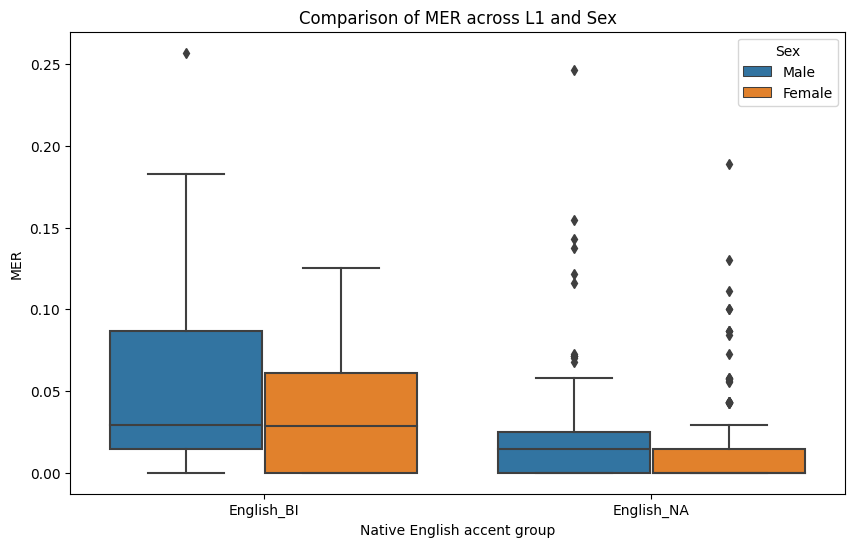

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# again keep an eye on this to make sure we have correct dataset
df = data1

# Rename the columns for clarity
df.columns = ['speakerid', 'Age', 'L1', 'L1_coded', 'Sex', 'WER', 'MER', 'norm_area']

# Drop rows with missing values in the 'L1' column
df = df.dropna(subset=['L1'])

# Create a dictionary to map L1_coded values to their corresponding names in L1
l1_mapping = {1: 'English_BI', 2: 'English_NA'}

# Map L1_coded to its corresponding name in L1
df['L1_name'] = df['L1_coded'].map(l1_mapping)

# Map sex to corresponding categories (0: Male, 1: Female)
df['sex_category'] = df['Sex'].map({0: 'Male', 1: 'Female'})

# Create a box plot to compare WER between L1 and sex categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='L1_name', y='MER', hue='sex_category', data=df)
plt.xlabel('Native English accent group')
plt.ylabel('MER')
plt.title('Comparison of MER across L1 and Sex')
plt.legend(title='Sex')
plt.show()


**3.2 RO2: MER ACROSS ACCENT VARIANTS**

In [ ]:
# mount data from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data2=pd.read_csv('/content/drive/MyDrive/full_data_final_2.csv')
display(data2)

Mounted at /content/drive


,speakerid_x,age,age_onset,L1,L1_coded,sex,Eng_experience,typology,vowels,WER,MER,norm_area,mer_group
0,1885,26.0,2.0,arabic,1,1,98.0,0,6,0.000000,0.000000,942.193326,0
1,1964,28.0,3.0,arabic,1,0,97.0,0,6,0.000000,0.000000,1776.897070,0
2,1894,18.0,4.0,arabic,1,1,96.0,0,6,0.000000,0.000000,1709.572240,0
3,1253,34.0,6.0,arabic,1,1,94.0,0,6,0.000000,0.000000,988.316962,0
4,1753,20.0,7.0,arabic,1,0,94.0,0,6,0.000000,0.000000,1239.332270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1616,47.0,16.0,mandarin,13,1,79.0,2,6,0.463768,0.426667,1389.470680,2
1023,326,25.0,8.0,spanish,16,0,92.0,0,5,0.449275,0.436620,559.345052,2
1024,1422,21.0,13.0,arabic,1,0,82.0,0,6,0.478261,0.452055,500.472517,2
1025,400,41.0,12.0,vietnamese,19,0,83.0,2,11,0.492754,0.478873,1337.307920,2


**Figure 3**

In [ ]:
# mount data from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data2=pd.read_csv('/content/drive/MyDrive/full_data_final_2.csv')
display(data2)

Mounted at /content/drive


,speakerid_x,age,age_onset,L1,L1_coded,sex,Eng_experience,typology,vowels,WER,MER,norm_area,mer_group
0,1885,26.0,2.0,arabic,1,1,98.0,0,6,0.000000,0.000000,942.193326,0
1,1964,28.0,3.0,arabic,1,0,97.0,0,6,0.000000,0.000000,1776.897070,0
2,1894,18.0,4.0,arabic,1,1,96.0,0,6,0.000000,0.000000,1709.572240,0
3,1253,34.0,6.0,arabic,1,1,94.0,0,6,0.000000,0.000000,988.316962,0
4,1753,20.0,7.0,arabic,1,0,94.0,0,6,0.000000,0.000000,1239.332270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1616,47.0,16.0,mandarin,13,1,79.0,2,6,0.463768,0.426667,1389.470680,2
1023,326,25.0,8.0,spanish,16,0,92.0,0,5,0.449275,0.436620,559.345052,2
1024,1422,21.0,13.0,arabic,1,0,82.0,0,6,0.478261,0.452055,500.472517,2
1025,400,41.0,12.0,vietnamese,19,0,83.0,2,11,0.492754,0.478873,1337.307920,2


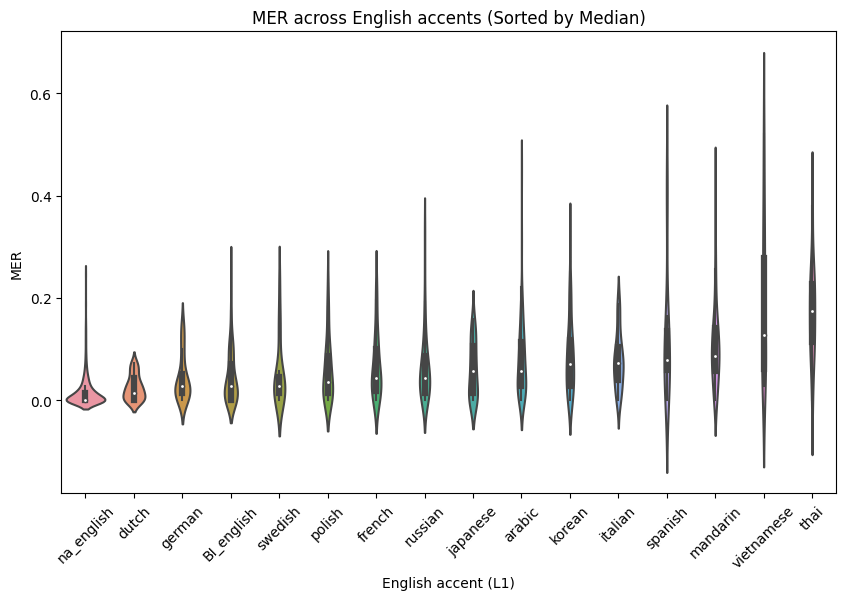

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check w ehave correct dataset
df = data2

# Specify the column names
wer_column = 'MER'
accent_variety_column = 'L1'

# Calculate the median WER for each accent variety
median_wer = df.groupby(accent_variety_column)[wer_column].median().sort_values()

# Sort the dataframe based on median WER
df_sorted = df.loc[df[accent_variety_column].isin(median_wer.index)]

# Create a violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x=accent_variety_column, y=wer_column, data=df_sorted, order=median_wer.index)
plt.xlabel('English accent (L1)')
plt.ylabel('MER')
plt.title('MER across English accents (Sorted by Median)')
plt.xticks(rotation=45)
plt.show()


**3.3.1. RO3: MER and speaker characteristics**

**Figure 4: Heatmap**

<Axes: >

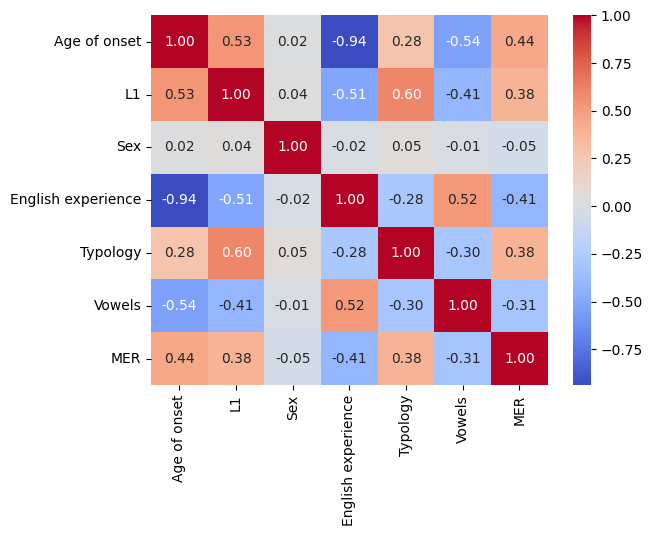

In [ ]:
import pandas as pd
import seaborn as sns

selected_features = ['age_onset', 'L1_coded', 'sex', 'Eng_experience', 'typology', 'vowels', 'MER']
feature_names = ['Age of onset', 'L1', 'Sex', 'English experience', 'Typology', 'Vowels', 'MER']

data2_df = data2[selected_features]  # Select only the desired features
data2_df.columns = feature_names  # Update column names

sns.heatmap(data2_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")


**STATS FOR RO3: OLS AND FIGURE 7**

                            OLS Regression Results                            
Dep. Variable:                    MER   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     58.83
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.32e-62
Time:                        13:00:32   Log-Likelihood:                 1439.3
No. Observations:                1027   AIC:                            -2865.
Df Residuals:                    1020   BIC:                            -2830.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2321      0.023     10.

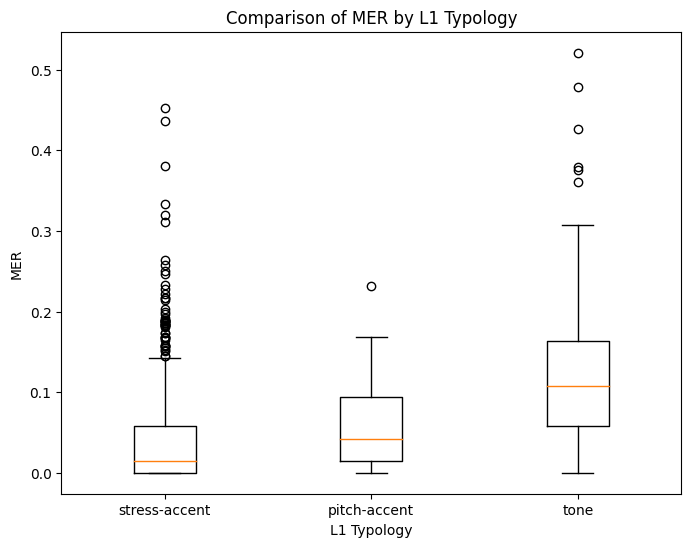

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# check dataset
df = data2

# Convert L1_coded column to numerical data type
df['L1_coded'] = df['L1_coded'].astype('int')

# Select the predictor variables and the outcome variable
X = df[['age', 'L1_coded', 'sex', 'Eng_experience', 'vowels', 'typology']]
y = df['MER']

# Generate interaction terms
X_interactions = X.copy()

# Specify the variables for interaction
interaction_vars = ['typology']

# Generate interaction terms for selected variables
for var1 in interaction_vars:
    for var2 in interaction_vars:
        if var1 != var2:
            interaction_term = X[var1] * X[var2]
            interaction_label = f'{var1}:{var2}'
            X_interactions[interaction_label] = interaction_term

# Add constant term for the model
X_interactions = sm.add_constant(X_interactions)

# Fit the polynomial regression model with interactions
model_interactions = sm.OLS(y, X_interactions).fit()

# Print the summary of the regression model with interactions
print(model_interactions.summary())

# Box plot for 'typology'
# Create a dictionary to map typology codes to their corresponding labels
typology_mapping = {0: 'stress-accent', 1: 'pitch-accent', 2: 'tone'}

# Map typology codes to their labels
df['typology_label'] = df['typology'].map(typology_mapping)
plt.figure(figsize=(8, 6))
typology_groups = ['stress-accent', 'pitch-accent', 'tone']
mer_data = [df[df['typology_label'] == group]['MER'] for group in typology_groups]
plt.boxplot(mer_data, labels=typology_groups)
plt.xlabel('L1 Typology')
plt.ylabel('MER')
plt.title('Comparison of MER by L1 Typology')
plt.show()


**STATS FOR RO3: OLS with native speakers removed**

In [ ]:
# mount data from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data3=pd.read_csv('/content/drive/MyDrive/native_removed.csv')
display(data3)

Mounted at /content/drive


,speakerid_x,age,age_onset,L1,L1_coded,sex,Eng_experience,typology,vowels,WER,MER,norm_area
0,1422,21,13.0,Arabic,1,0,82.0,0,6,0.478261,0.452055,500.472517
1,1458,39,16.0,Arabic,1,0,79.0,0,6,0.347826,0.311688,837.621350
2,1920,22,21.0,Arabic,1,0,71.0,0,6,0.231884,0.222222,496.145976
3,970,40,7.0,Arabic,1,0,93.0,0,6,0.217391,0.202703,630.641616
4,2086,57,12.0,Arabic,1,1,83.0,0,6,0.217391,0.200000,873.404279
...,...,...,...,...,...,...,...,...,...,...,...,...
528,1940,33,11.0,Vietnamese,19,1,84.0,2,11,0.057971,0.057143,1966.574460
529,1192,57,18.0,Vietnamese,19,1,77.0,2,11,0.057971,0.057971,1261.963360
530,1529,24,9.0,Vietnamese,19,1,92.0,2,11,0.043478,0.042857,2163.665720
531,2010,19,11.0,Vietnamese,19,1,86.0,2,11,0.043478,0.042254,884.555209


**FOCUS ONLY ON TYPOLOGY HERE TO ESTABLISH THAT DATASET WASN'T SKEWED DUE TO LARGE NUMBER OF L1 ENGLISH SPEAKERS IN THE STRESS-ACCENT CATEGORY"**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = data3 #double check this is the right dataset - have been playing with a few

# Convert L1_coded column to numerical data type
df['L1_coded'] = df['L1_coded'].astype('int')

# Select the predictor variables and the outcome variable
X = df[['typology']]
#  THis is the only variable of interest,...
# but could toy around a bit and add others - it is not expected to replicate...
#  the full model with the native speakers


y = df['MER']

# Generate interaction terms
X_interactions = X.copy()

# Specify the variables for interaction
interaction_vars = ['typology']

# Generate interaction terms for selected variables
for var1 in interaction_vars:
    for var2 in interaction_vars:
        if var1 != var2:
            interaction_term = X[var1] * X[var2]
            interaction_label = f'{var1}:{var2}'
            X_interactions[interaction_label] = interaction_term

# Add constant term for the model
X_interactions = sm.add_constant(X_interactions)

# Fit the polynomial regression model with interactions
model_interactions = sm.OLS(y, X_interactions).fit()

# Print the summary of the regression model with interactions
print(model_interactions.summary())



                            OLS Regression Results                            
Dep. Variable:                    MER   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     46.70
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.27e-11
Time:                        11:30:14   Log-Likelihood:                 611.87
No. Observations:                 533   AIC:                            -1220.
Df Residuals:                     531   BIC:                            -1211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0659      0.004     17.018      0.0

**BACK TO THE FULL DATASET WITH NATIVE SPEAKERS. HERE FIGURE 5: EGLISH EXPERIENCE vs MEAN MER**

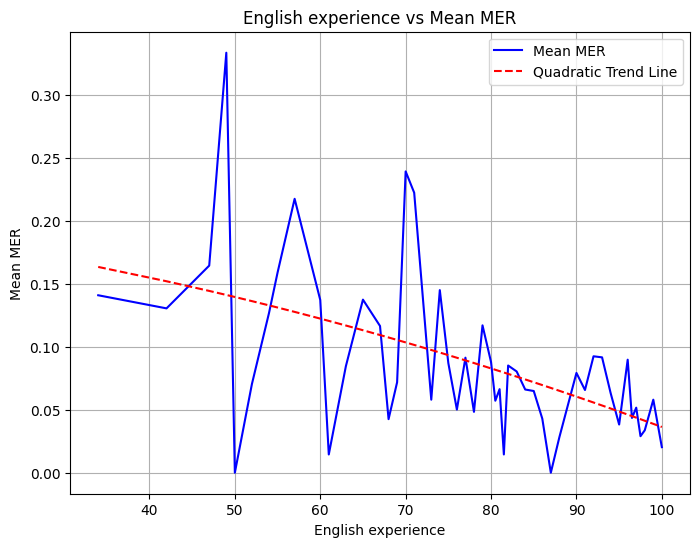

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# watch for potential mixups with df as I've used this in respect of several datasets
df = data2

# Compute the mean 'MER' for each unique 'Eng_experience'
mean_mer_by_prof = df.groupby('Eng_experience')['MER'].mean()

# Plot 'Eng_experience' vs Mean 'MER' with trend line
plt.figure(figsize=(8, 6))
plt.plot(mean_mer_by_prof.index, mean_mer_by_prof.values, color='b', label='Mean MER')
plt.xlabel('English experience')
plt.ylabel('Mean MER')
plt.title('English experience vs Mean MER')

# Perform quadratic regression to get the coefficients for the trend line
coefficients = np.polyfit(mean_mer_by_prof.index, mean_mer_by_prof.values, 2)
trend_line = np.polyval(coefficients, mean_mer_by_prof.index)

# Plot the quadratic trend line
plt.plot(mean_mer_by_prof.index, trend_line, color='r', linestyle='--', label='Quadratic Trend Line')

plt.legend()
plt.grid(True)
plt.show()


**Figure 6: MATCH ERROR RATE BY SEX**

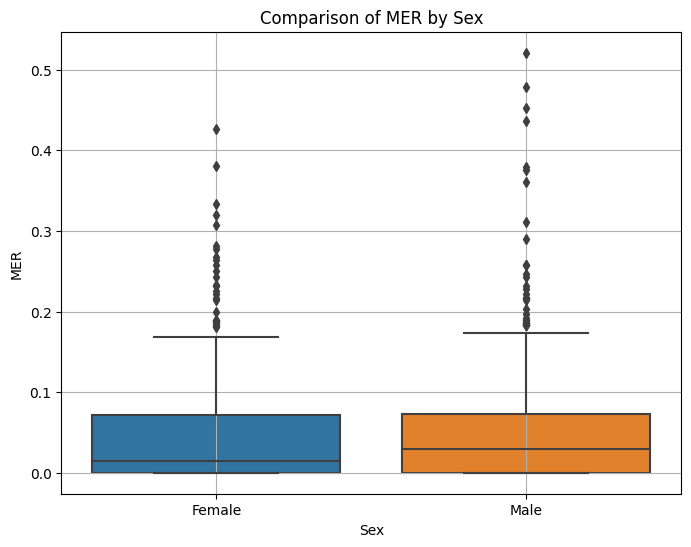

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# as above
df = data2

# Map 'sex' to '0' and '1' for custom labels
df['sex_label'] = df['sex'].map({0: 'Male', 1: 'Female'})

# Plot box plot of 'MER' vs 'sex' with custom labels
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex_label', y='MER', data=df, hue_order=['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('MER')
plt.title('Comparison of MER by Sex')
plt.grid(True)
plt.show()


**3.3.2? - PCA & KMEANS  CHECK NUMBERING IN PAPER FOR CONSISTENCY**

In [ ]:
# mount data from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data2=pd.read_csv('/content/drive/MyDrive/full_data_final_2.csv')#reminder: this is the dataset with MER RANGES
display(data2)

Mounted at /content/drive


,speakerid_x,age,age_onset,L1,L1_coded,sex,Eng_experience,typology,vowels,WER,MER,norm_area,mer_group
0,1885,26.0,2.0,arabic,1,1,98.0,0,6,0.000000,0.000000,942.193326,0
1,1964,28.0,3.0,arabic,1,0,97.0,0,6,0.000000,0.000000,1776.897070,0
2,1894,18.0,4.0,arabic,1,1,96.0,0,6,0.000000,0.000000,1709.572240,0
3,1253,34.0,6.0,arabic,1,1,94.0,0,6,0.000000,0.000000,988.316962,0
4,1753,20.0,7.0,arabic,1,0,94.0,0,6,0.000000,0.000000,1239.332270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1616,47.0,16.0,mandarin,13,1,79.0,2,6,0.463768,0.426667,1389.470680,2
1023,326,25.0,8.0,spanish,16,0,92.0,0,5,0.449275,0.436620,559.345052,2
1024,1422,21.0,13.0,arabic,1,0,82.0,0,6,0.478261,0.452055,500.472517,2
1025,400,41.0,12.0,vietnamese,19,0,83.0,2,11,0.492754,0.478873,1337.307920,2


**First, we detremine the OPTIMAL number of clusters for the K-MEANS**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

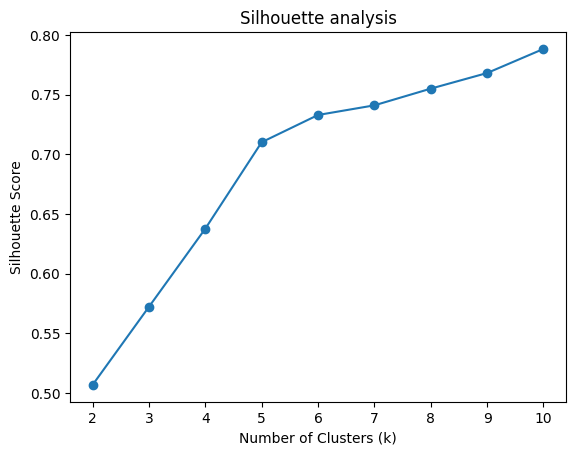

The OPTIMAL number of clusters is: 10


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# chech dataset
df = data2

# Separate the features (X) and target variable (y)
X = df[['Eng_experience', 'typology', 'sex']]
y = df['mer_group']

# Standardise the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):  # Test different values of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_standardized)
    silhouette_scores.append(silhouette_score(X_standardized, clusters))

# Plot the silhouette scores to determine the optimal number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis')
plt.show()

# Choose the optimal number of clusters based on the silhouette score
best_k = np.argmax(silhouette_scores) + 2  # Add 2 to account for the starting k value
print(f"The OPTIMAL number of clusters is: {best_k}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.7882
Completeness Score: 0.0421
Homogeneity Score: 0.1421
Adjusted Rand Index: 0.0686

Cluster Profiles:
        PCA Component 1                     PCA Component 2            \
                   mean    median       std            mean    median   
Cluster                                                                 
0              1.519021  1.654533  0.285911       -0.837937 -0.804003   
1              0.186825  0.199799  0.284037        1.077088  1.080337   
2             -0.095853 -0.115828  0.116942       -1.042321 -1.047323   
3              2.621574  2.789681  0.427915       -0.761845 -0.719749   
4              2.124064  1.982911  0.856326        1.078421  1.380795   
5              2.348459  2.470095  0.581583        1.218386  1.248845   
6             -0.669933 -0.680461  0.051453       -1.186078 -1.188714   
7              0.629512  0.589963  0.246001       -0.860679 -0.870583   
8             -0.934060 -1.000046  0.161590        0.796403  0.779880   

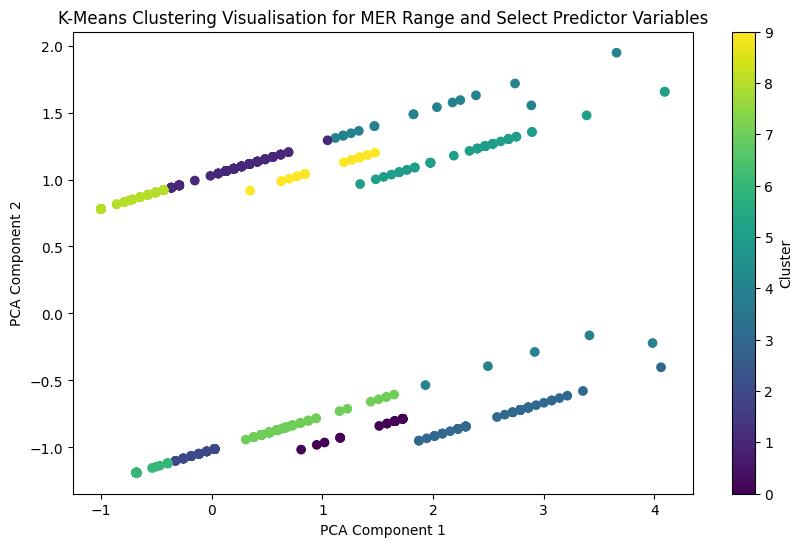

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = data2

# Separate the features (X) and target variable (y)
X = df[['typology', 'sex', 'Eng_experience']]
y = df['mer_group']  # 'mer_group' as the independent variable

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Perform KMeans clustering with 10 clusters
n_clusters = 10  # This is based on previous analysis to determine optimal no. of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_standardized)

# Calculate silhouette, completeness, homogeneity, and Adjusted Rand scores
silhouette_avg = silhouette_score(X_standardized, clusters)
completeness_avg = completeness_score(y, clusters)
homogeneity_avg = homogeneity_score(y, clusters)
ari = adjusted_rand_score(y, clusters)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Completeness Score: {completeness_avg:.4f}")
print(f"Homogeneity Score: {homogeneity_avg:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")

# Calculate cluster profiles
cluster_profiles = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
cluster_profiles['Cluster'] = clusters
cluster_profiles_grouped = cluster_profiles.groupby('Cluster').agg(['mean', 'median', 'std'])

print("\nCluster Profiles:")
print(cluster_profiles_grouped)

# Visualize the clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualisation for MER Range and Select Predictor Variables')
plt.colorbar(label='Cluster')
plt.show()


**WE USE THE VALUES IN THE PCA ANALYSIS ABOVE TO PLUG INTO THE CLUSTER ANALYSIS, USING TWO DISTANCE METRICS: EUCLIDEAN VS COSINE SIMILARITY**

**EUCLIDEAN VERSION**

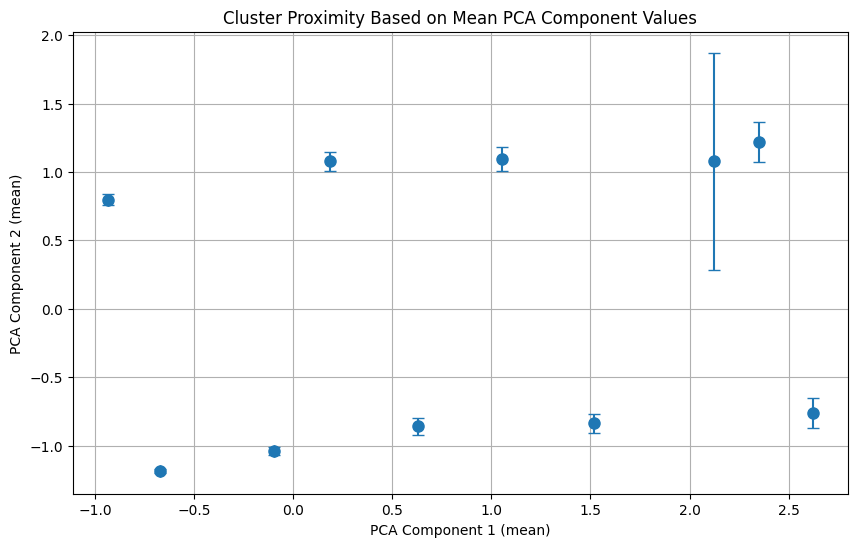

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the cluster profiles as a DataFrame
cluster_profiles = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCA Component 1 (mean)': [1.519021, 0.186825, -0.095853, 2.621574, 2.124064, 2.348459, -0.669933, 0.629512, -0.934060, 1.052631],
    'PCA Component 2 (mean)': [-0.837937, 1.077088, -1.042321, -0.761845, 1.078421, 1.218386, -1.186078, -0.860679, 0.796403, 1.093895],
    'PCA Component 2 (std)': [0.071596, 0.071127, 0.029284, 0.107156, 0.793078, 0.145636, 0.012884, 0.061602, 0.040464, 0.085438]
})

# Plot the mean values of PCA components for each cluster
plt.figure(figsize=(10, 6))
plt.errorbar(cluster_profiles['PCA Component 1 (mean)'], cluster_profiles['PCA Component 2 (mean)'],
             xerr=0, yerr=cluster_profiles['PCA Component 2 (std)'],
             fmt='o', markersize=8, capsize=4)
plt.xlabel('PCA Component 1 (mean)')
plt.ylabel('PCA Component 2 (mean)')
plt.title('Cluster Proximity Based on Mean PCA Component Values')
plt.grid(True)
plt.show()


**COSINE SIMILARITY VERSION**

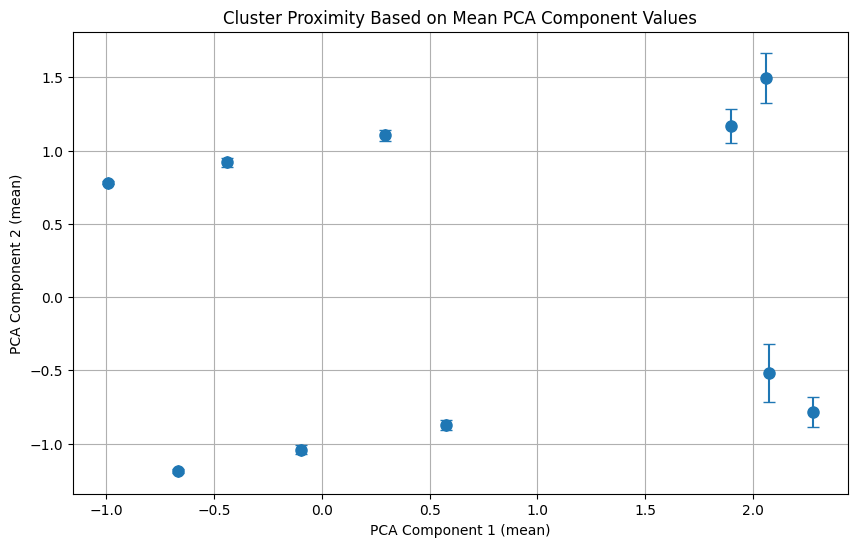

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the new cluster profiles as a dataframe
new_cluster_profiles = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCA Component 1 (mean)': [0.291552, -0.095853, -0.991991, 2.072615, 2.277026, 1.896052, -0.669933, -0.439824, 2.061029, 0.577013],
    'PCA Component 2 (mean)': [1.103313, -1.042321, 0.781897, -0.515974, -0.785624, 1.166636, -1.186078, 0.920167, 1.496414, -0.873826],
    'PCA Component 2 (std)': [0.039885, 0.029284, 0.010693, 0.197607, 0.103275, 0.116483, 0.012884, 0.031154, 0.171841, 0.032036]
})

# Plot the mean values of PCA components for each cluster
plt.figure(figsize=(10, 6))
plt.errorbar(new_cluster_profiles['PCA Component 1 (mean)'], new_cluster_profiles['PCA Component 2 (mean)'],
             xerr=0, yerr=new_cluster_profiles['PCA Component 2 (std)'],
             fmt='o', markersize=8, capsize=4)
plt.xlabel('PCA Component 1 (mean)')
plt.ylabel('PCA Component 2 (mean)')
plt.title('Cluster Proximity Based on Mean PCA Component Values')
plt.grid(True)
plt.show()


**RO4 CONVERSATIONAL DATA**

**STATS**

In [ ]:
# mount data from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data4=pd.read_csv('/content/drive/MyDrive/free_MER.csv')#dataset with conversational data
display(data4)

Mounted at /content/drive


,speaker_id,L1,L1_coded,typology,sex,YOB,age,score,WER,MER,mer_group
0,1,Dutch,2,0,1,1950,66,14.0,0.055556,0.055556,0
1,2,Thai,5,1,0,1983,33,11.5,0.071429,0.071429,0
2,3,French,3,0,0,1979,37,13.5,0.076923,0.076923,0
3,4,Thai,5,1,0,1969,47,26.0,0.083333,0.083333,0
4,5,French,3,0,1,1970,46,25.0,0.094017,0.094017,0
...,...,...,...,...,...,...,...,...,...,...,...
128,129,Vietnamese,6,1,0,1984,32,13.5,0.513889,0.475000,3
129,130,Vietnamese,6,1,1,1983,33,10.0,0.500000,0.477273,3
130,131,Thai,5,1,1,1981,35,12.5,0.521008,0.485714,3
131,132,French,3,0,0,1987,29,13.5,0.500000,0.500000,3


                            OLS Regression Results                            
Dep. Variable:                    MER   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.335
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.87e-05
Time:                        12:25:34   Log-Likelihood:                 133.51
No. Observations:                 133   AIC:                            -243.0
Df Residuals:                     121   BIC:                            -208.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5974      0.131      4.

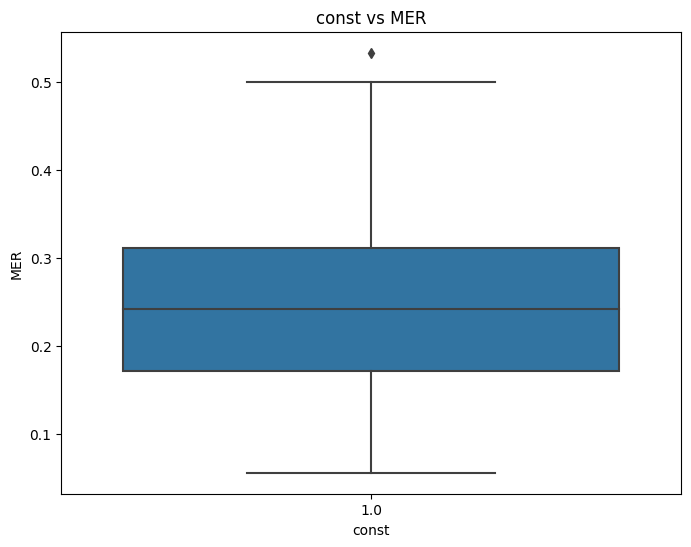

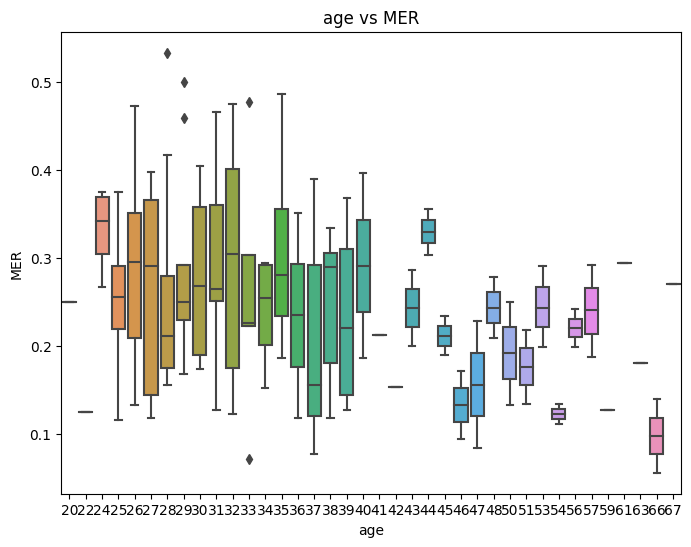

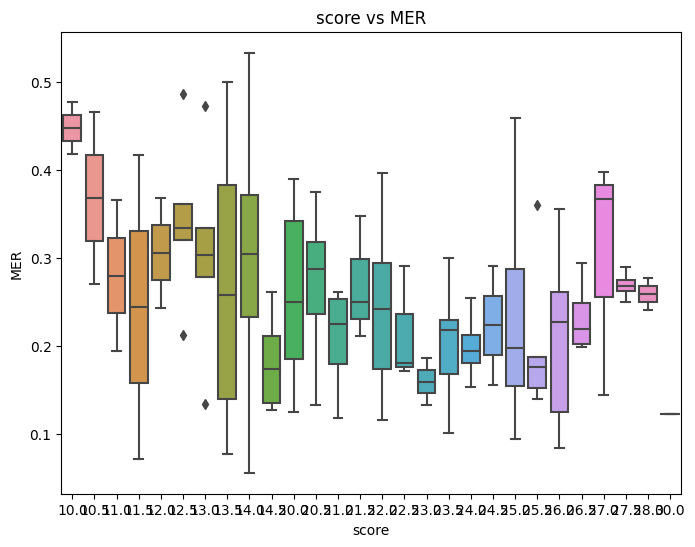

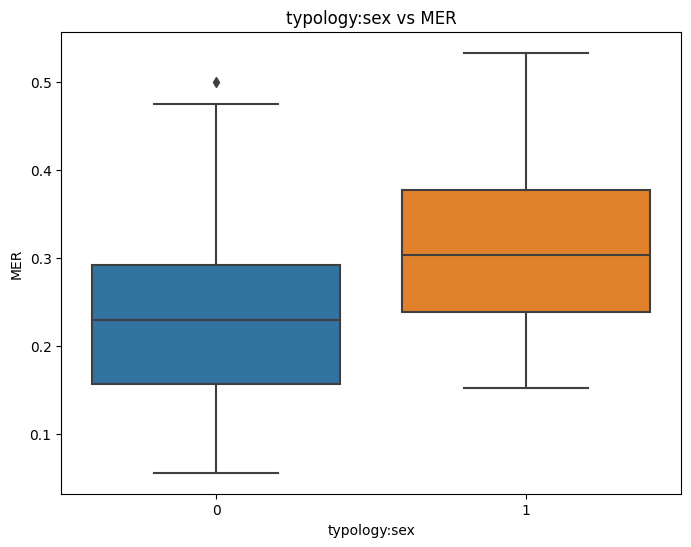

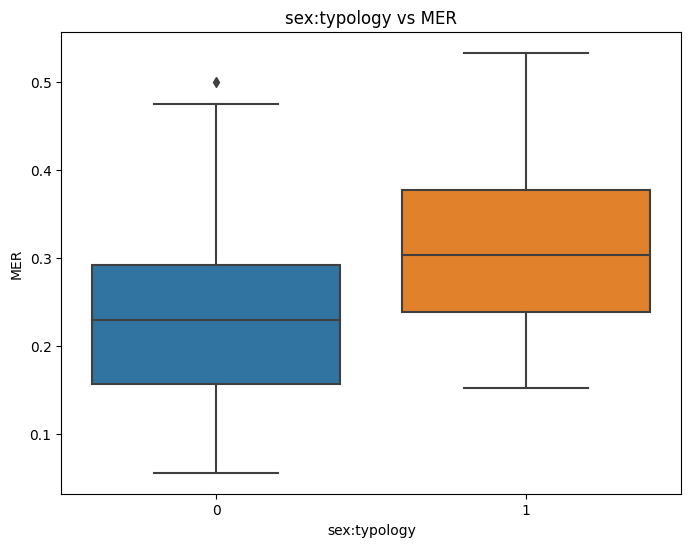

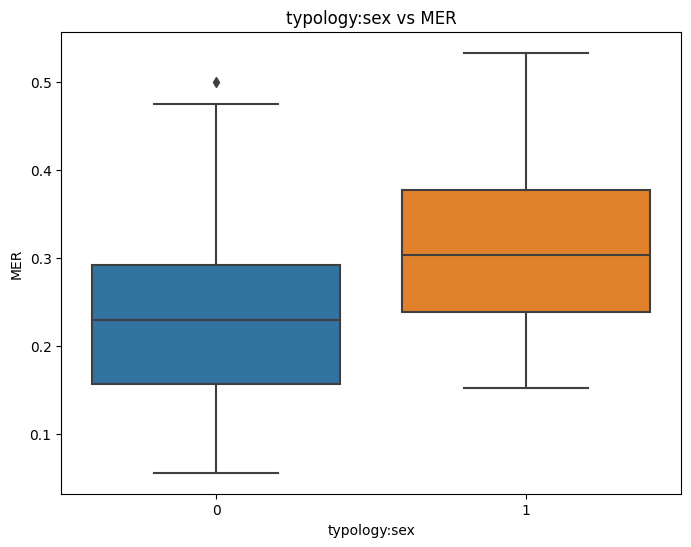

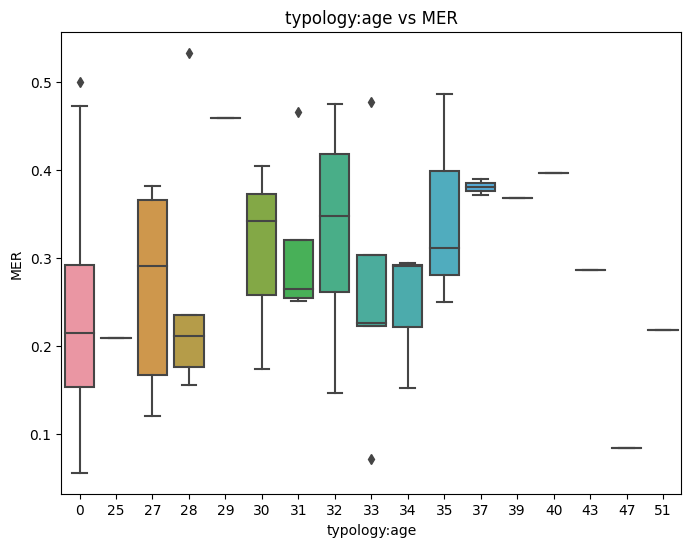

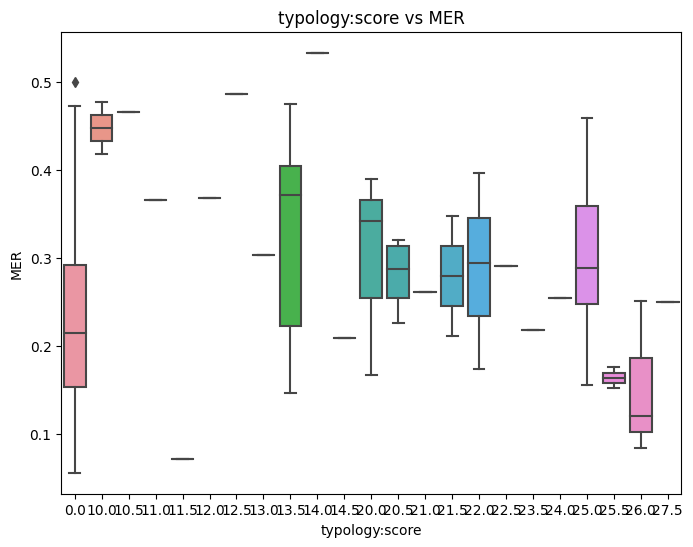

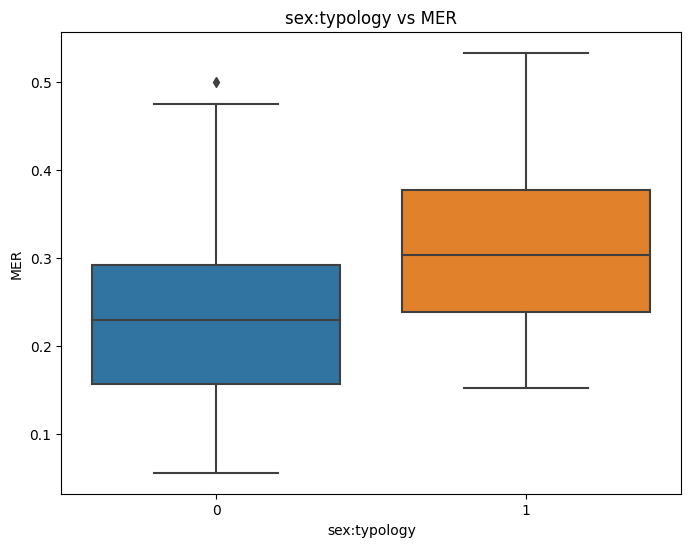

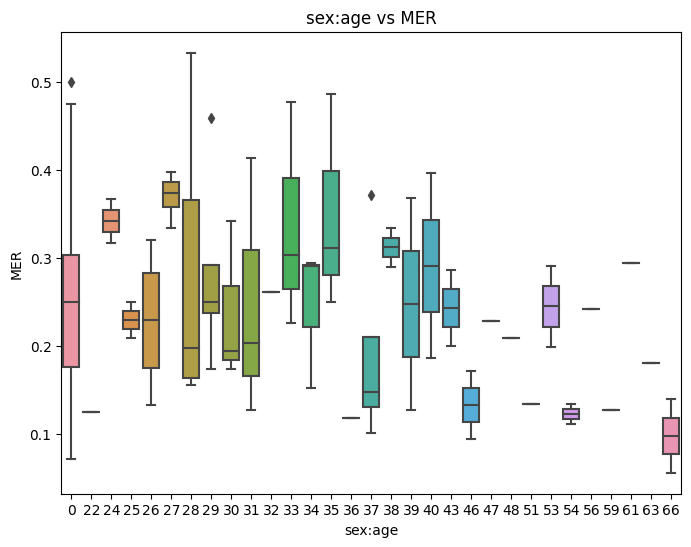

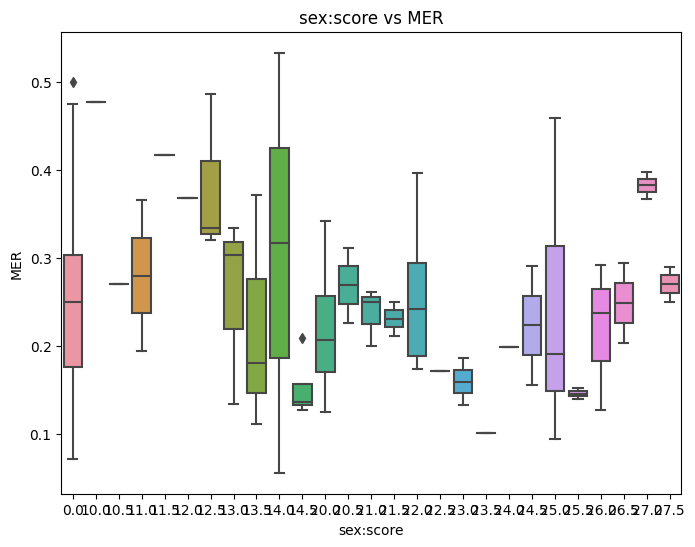

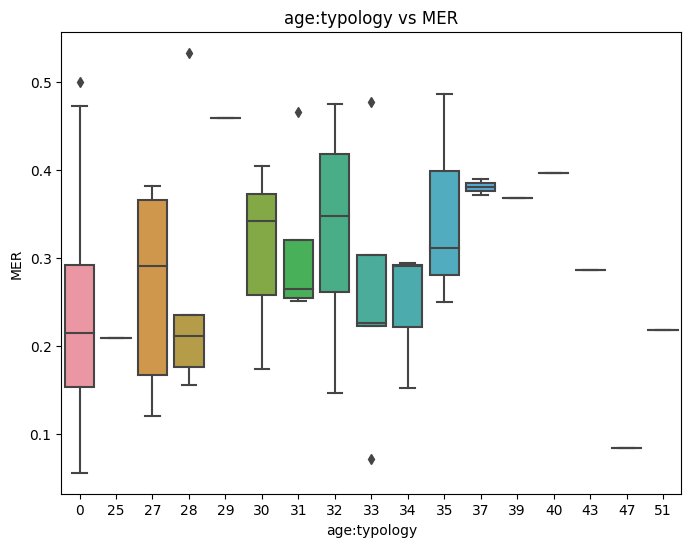

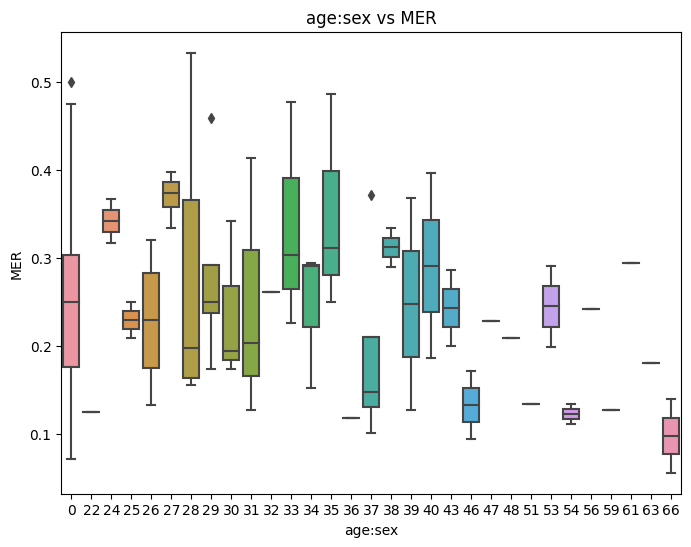

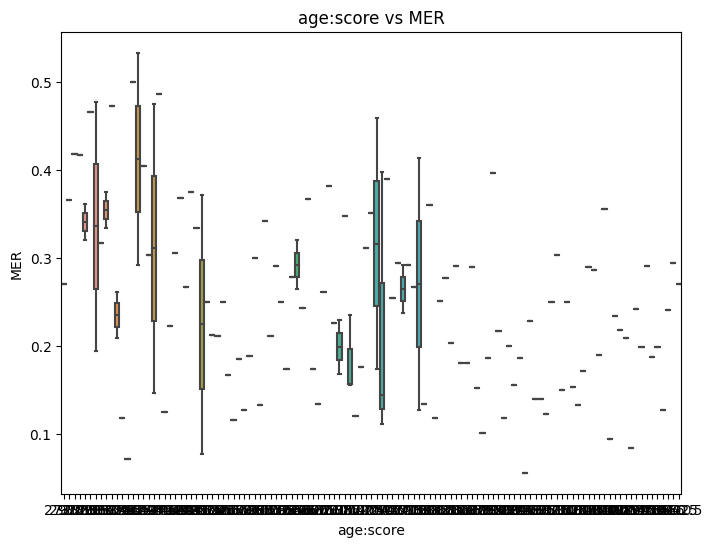

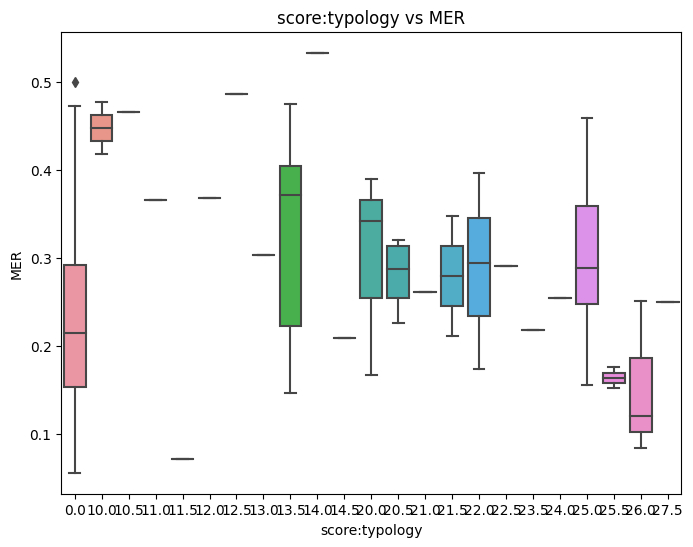

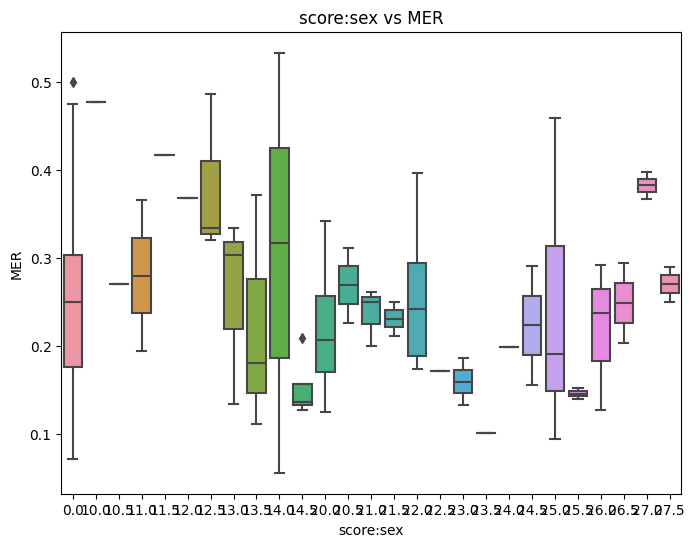

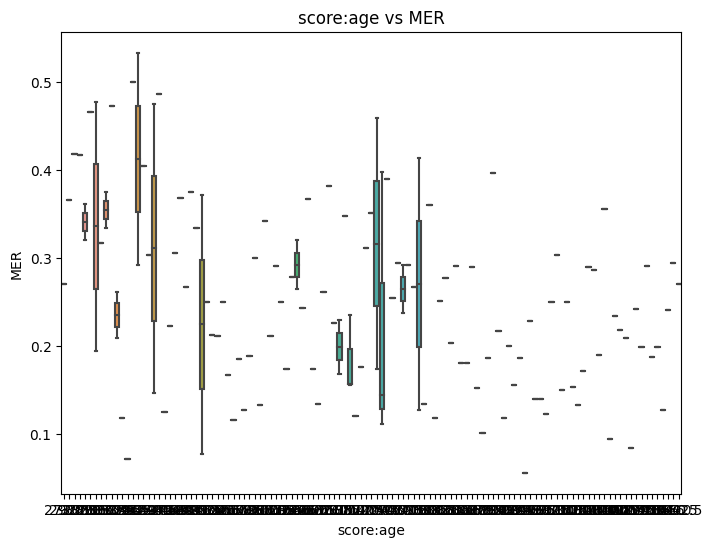

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# double check this is correct dataset - here I change from df to dfx
dfx = data4

# Convert L1_coded column to numerical data type
#mean_dfx['L1_coded'] = dfx['L1_coded'].astype('int') - done at preprocessing stage

# Select the predictor variables and the outcome variable
X = dfx[['age', 'L1_coded', 'sex', 'score', 'typology']]
y = dfx['MER']

# Generate interaction terms
X_interactions = X.copy()

# Specify the variables for interaction
interaction_vars = ['typology','sex','age','score']

# Generate interaction terms for selected variables
for var1 in interaction_vars:
    for var2 in interaction_vars:
        if var1 != var2:
            interaction_term = X[var1] * X[var2]
            interaction_label = f'{var1}:{var2}'
            X_interactions[interaction_label] = interaction_term

# Add constant term for the model
X_interactions = sm.add_constant(X_interactions)

# Fit the polynomial regression model with interactions
model_interactions = sm.OLS(y, X_interactions).fit()

# Print the summary of the regression model with interactions
print(model_interactions.summary())

# Print the coefficients, t-values, and p-values for the interaction terms
for interaction in interaction_vars:
    for other_var in interaction_vars:
        if interaction != other_var:
            interaction_label = f'{interaction}:{other_var}'
            coef = model_interactions.params[interaction_label]
            std_err = model_interactions.bse[interaction_label]
            t_value = model_interactions.tvalues[interaction_label]
            p_value = model_interactions.pvalues[interaction_label]
            print(f"Interaction: {interaction_label}")
            print(f"Coefficient (coef): {coef:.4f}")
            print(f"Standard Error: {std_err:.4f}")
            print(f"T-value: {t_value:.4f}")
            print(f"P-value: {p_value:.4f}")
            print("=" * 40)

# Boxplots of significant variables
significant_vars = model_interactions.pvalues[model_interactions.pvalues < 0.05].index
for var in significant_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=pd.Series(X_interactions[var]), y=pd.Series(y))
    plt.xlabel(var)
    plt.ylabel('MER')
    plt.title(f'{var} vs MER')
    plt.show()

# Boxplots of significant interaction variables
significant_interactions = [f'{var1}:{var2}' for var1 in interaction_vars for var2 in interaction_vars if var1 != var2]
for interaction in significant_interactions:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=pd.Series(X_interactions[interaction]), y=pd.Series(y))
    plt.xlabel(interaction)
    plt.ylabel('MER')
    plt.title(f'{interaction} vs MER')
    plt.show()#most of thse plots will be useless


**FIGURE 10: SEX & TYPOLOGY INTERACTION**

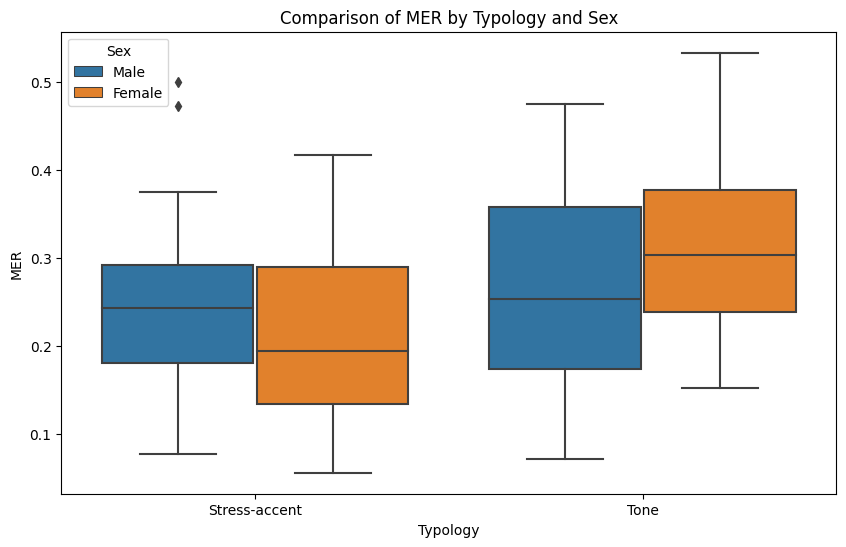

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dfx = data4

# Rename the columns for clarity
#dfx.columns = ['speakerid', 'L1', 'L1_coded', 'typology','sex', 'YOB','age','score','WER', 'MER']

# Drop rows with missing values in the 'L1' column
dfx = dfx.dropna(subset=['typology'])

# Create a dictionary to map L1_coded values to their corresponding names in L1
typology_labels = {0: 'Stress-accent', 1: 'Tone'}

# Map L1_coded to its corresponding name in L1
dfx['typology_label'] = dfx['typology'].map(typology_labels)

# Map sex to corresponding categories (0: Male, 1: Female)
dfx['sex_category'] = dfx['sex'].map({0: 'Male', 1: 'Female'})

# Define the desired order of the 'typology_label' and 'sex_category' categories
typology_order = ['Stress-accent', 'Tone']
sex_order = ['Male', 'Female']

# Create a box plot to compare WER between L1 and sex categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='typology_label', y='MER', hue='sex_category', data=dfx, order=typology_order, hue_order=sex_order)
plt.xlabel('Typology')
plt.ylabel('MER')
plt.title('Comparison of MER by Typology and Sex')
plt.legend(title='Sex')
plt.show()


**CONVERSATIONAL VS READ SPEECH: STATS**

In [ ]:
# mount data from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data5=pd.read_csv('/content/drive/MyDrive/merged.csv')#dataset with conversational & read data
display(data5)

Mounted at /content/drive


,speakerid_x,L1,L1_coded,WER,MER,speech_type
0,1422,Arabic,1,0.478261,0.452055,1
1,1458,Arabic,1,0.347826,0.311688,1
2,1920,Arabic,1,0.231884,0.222222,1
3,970,Arabic,1,0.217391,0.202703,1
4,2086,Arabic,1,0.217391,0.200000,1
...,...,...,...,...,...,...
373,3128,Vietnamese,6,0.175403,0.175403,2
374,3129,Vietnamese,6,0.177778,0.173611,2
375,3130,Vietnamese,6,0.166667,0.166667,2
376,3131,Vietnamese,6,0.155609,0.155609,2


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# new dataset alert
df = data5

# Fit the linear mixed model with the interaction between 'L1_coded' and 'speech_type'
model_formula = "MER ~ L1_coded * speech_type"
model = smf.mixedlm(model_formula, df, groups=df['speakerid_x'])
result = model.fit()

# Print the summary of the linear mixed model
print(result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     MER     
No. Observations:     378         Method:                 REML    
No. Groups:           378         Scale:                  0.0041  
Min. group size:      1           Log-Likelihood:         355.0955
Max. group size:      1           Converged:              Yes     
Mean group size:      1.0                                         
------------------------------------------------------------------
                     Coef.    Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept            -0.141       0.028 -5.099 0.000 -0.195 -0.087
L1_coded              0.024       0.008  2.868 0.004  0.008  0.040
speech_type           0.178       0.021  8.522 0.000  0.137  0.219
L1_coded:speech_type -0.007       0.006 -1.193 0.233 -0.018  0.004
Group Var             0.004 4309314.879                           



**FIGURE 11**

<ipython-input-43-91a51279e0b1>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='L1_name', y='MER', hue='speech_type_name', data=df, ci='sd')


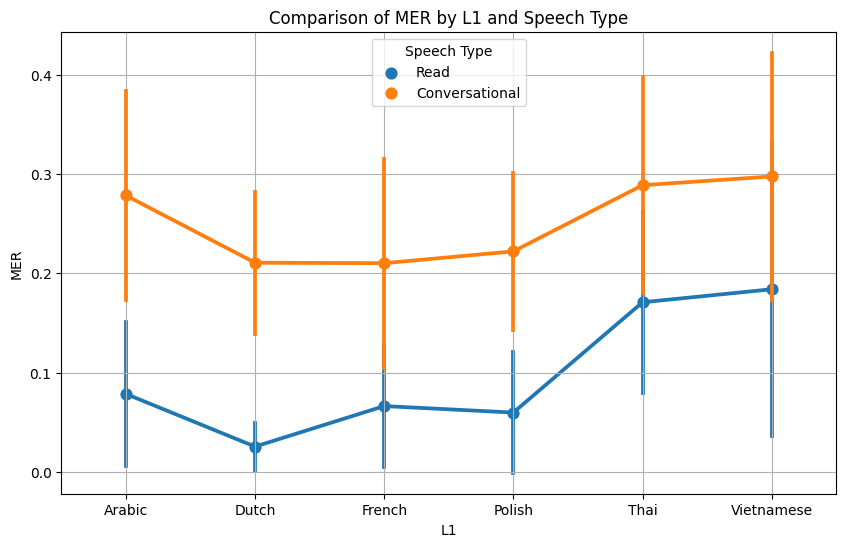

One-way ANOVA results:
ANOVA Statistic: 17.203777901093428
P-value: 2.553955150891144e-15


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# check that dataset is correct - calbert
df = data5

# Create a mapping of numerical codes to language names for 'L1'
language_mapping = {1: 'Arabic', 2: 'Dutch', 3: 'French', 4: 'Polish', 5: 'Thai', 6: 'Vietnamese'}
df['L1_name'] = df['L1_coded'].map(language_mapping)

# Create a mapping of numerical codes to speech types for 'speech_type'
speech_type_mapping = {1: 'Read', 2: 'Conversational'}
df['speech_type_name'] = df['speech_type'].map(speech_type_mapping)

# Plot point plot with error bars to compare 'MER' by 'L1' and 'speech_type'
plt.figure(figsize=(10, 6))
sns.pointplot(x='L1_name', y='MER', hue='speech_type_name', data=df, ci='sd')
plt.xlabel('L1')
plt.ylabel('MER')
plt.title('Comparison of MER by L1 and Speech Type')
plt.grid(True)
plt.legend(title='Speech Type')
plt.show()

# Perform one-way ANOVA to test for statistical differences between 'L1' and 'speech_type'
anova_results = []
for l1_name in df['L1_name'].unique():
    group_data = df[df['L1_name'] == l1_name]
    anova_results.append(group_data['MER'].values)

anova_stat, p_value = f_oneway(*anova_results)

print(f"One-way ANOVA results:")
print(f"ANOVA Statistic: {anova_stat}")
print(f"P-value: {p_value}")
